In [10]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import gym
import tensorflow as tf
import time 
import copy
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [2]:
# Deep-Q learning Agent
class DQNAgent:
    def __init__(self, env):
        self.env = env
        self.memory = []
        self.gamma = 0.9  # decay rate
        self.epsilon = 1  # exploration
        self.epsilon_decay = .995
        self.epsilon_min = 0.1
        self.learning_rate = 0.0001
        self.load_model()
    
    def _build_model(self):
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Dense(64,input_dim=4,activation='tanh'))
        model.add(tf.keras.layers.Dense(128,activation='tanh'))
        model.add(tf.keras.layers.Dense(128,activation='tanh'))
        model.add(tf.keras.layers.Dense(2,activation='linear'))

        model.compile(loss='mse',optimizer='adam')
        
        self.model = model
    def save_model(self):
        tf.keras.models.save_model(self.model , "./model/CartPoleModel.h5")
        print("save model success")

    def load_model(self) :
        try:
            self.model = tf.keras.models.load_model("./model/CartPoleModel.h5")
            print("load model success")
        except:
            self._build_model()
            print("build model success")
        
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return env.action_space.sample()
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # returns action
    
    def replay(self, batch_size):
        batches = min(batch_size, len(self.memory))
        batches = np.random.choice(len(self.memory), batches)
        for i in batches:
            state, action, reward, next_state, done = self.memory[i]
            target = reward
            if not done:
                target = reward + self.gamma * \
                       np.amax(self.model.predict(next_state)[0])
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [3]:
history = {"score":[]}

In [19]:
# 为agent初始化gym环境参数
env = gym.make('CartPole-v0')
agent = DQNAgent(env)
episodes = 1001
# 游戏的主循环
for e in range(episodes):

    # 在每次游戏开始时复位状态参数
    state = env.reset()
    state = np.reshape(state, [1, 4])

    # time_t 代表游戏的每一帧
    # 我们的目标是使得杆子尽可能长地保持竖直朝上
    # time_t 越大，分数越高
    for time_t in range(5000):
        # turn this on if you want to render
        env.render()

        # 选择行为
        action = agent.act(state)

        # 在环境中施加行为推动游戏进行
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, 4])

        # reward缺省为1
        # 在每一个agent完成了目标的帧agent都会得到回报
        # 并且如果失败得到-100
        reward = -100 if done else reward

        # 记忆先前的状态，行为，回报与下一个状态
        agent.remember(state, action, reward, next_state, done)

        # 使下一个状态成为下一帧的新状态
        state = copy.deepcopy(next_state)

        # 如果游戏结束done被置为ture
        # 除非agent没有完成目标
        if done:
            # 打印分数并且跳出游戏循环
            print("episode: {}/{}, score: {}"
                  .format(e, episodes, time_t))
            history["score"].append(time_t)
            break
    # 通过之前的经验训练模型
    agent.replay(32)
    
    if e%100 == 0 :
        agent.save_model()
    
env.close()

load model success
episode: 0/1001, score: 19
save model success
episode: 1/1001, score: 14
episode: 2/1001, score: 11
episode: 3/1001, score: 10
episode: 4/1001, score: 11
episode: 5/1001, score: 17
episode: 6/1001, score: 21
episode: 7/1001, score: 50
episode: 8/1001, score: 16
episode: 9/1001, score: 34
episode: 10/1001, score: 52
episode: 11/1001, score: 53
episode: 12/1001, score: 33
episode: 13/1001, score: 26
episode: 14/1001, score: 47
episode: 15/1001, score: 14
episode: 16/1001, score: 10
episode: 17/1001, score: 17
episode: 18/1001, score: 14
episode: 19/1001, score: 16
episode: 20/1001, score: 14
episode: 21/1001, score: 12
episode: 22/1001, score: 14
episode: 23/1001, score: 18
episode: 24/1001, score: 10
episode: 25/1001, score: 17
episode: 26/1001, score: 28
episode: 27/1001, score: 75
episode: 28/1001, score: 38
episode: 29/1001, score: 13
episode: 30/1001, score: 12
episode: 31/1001, score: 34
episode: 32/1001, score: 23
episode: 33/1001, score: 23
episode: 34/1001, sc

episode: 284/1001, score: 12
episode: 285/1001, score: 11
episode: 286/1001, score: 26
episode: 287/1001, score: 27
episode: 288/1001, score: 21
episode: 289/1001, score: 16
episode: 290/1001, score: 49
episode: 291/1001, score: 44
episode: 292/1001, score: 74
episode: 293/1001, score: 85
episode: 294/1001, score: 89
episode: 295/1001, score: 75
episode: 296/1001, score: 75
episode: 297/1001, score: 86
episode: 298/1001, score: 30
episode: 299/1001, score: 102
episode: 300/1001, score: 99
save model success
episode: 301/1001, score: 99
episode: 302/1001, score: 94
episode: 303/1001, score: 82
episode: 304/1001, score: 84
episode: 305/1001, score: 106
episode: 306/1001, score: 101
episode: 307/1001, score: 113
episode: 308/1001, score: 103
episode: 309/1001, score: 102
episode: 310/1001, score: 36
episode: 311/1001, score: 13
episode: 312/1001, score: 37
episode: 313/1001, score: 64
episode: 314/1001, score: 96
episode: 315/1001, score: 10
episode: 316/1001, score: 99
episode: 317/1001,

episode: 564/1001, score: 31
episode: 565/1001, score: 33
episode: 566/1001, score: 87
episode: 567/1001, score: 93
episode: 568/1001, score: 10
episode: 569/1001, score: 95
episode: 570/1001, score: 13
episode: 571/1001, score: 53
episode: 572/1001, score: 94
episode: 573/1001, score: 32
episode: 574/1001, score: 22
episode: 575/1001, score: 22
episode: 576/1001, score: 38
episode: 577/1001, score: 11
episode: 578/1001, score: 98
episode: 579/1001, score: 96
episode: 580/1001, score: 90
episode: 581/1001, score: 94
episode: 582/1001, score: 92
episode: 583/1001, score: 92
episode: 584/1001, score: 51
episode: 585/1001, score: 91
episode: 586/1001, score: 88
episode: 587/1001, score: 81
episode: 588/1001, score: 105
episode: 589/1001, score: 99
episode: 590/1001, score: 112
episode: 591/1001, score: 104
episode: 592/1001, score: 99
episode: 593/1001, score: 110
episode: 594/1001, score: 28
episode: 595/1001, score: 12
episode: 596/1001, score: 22
episode: 597/1001, score: 15
episode: 5

episode: 842/1001, score: 113
episode: 843/1001, score: 165
episode: 844/1001, score: 199
episode: 845/1001, score: 199
episode: 846/1001, score: 196
episode: 847/1001, score: 188
episode: 848/1001, score: 104
episode: 849/1001, score: 105
episode: 850/1001, score: 54
episode: 851/1001, score: 23
episode: 852/1001, score: 34
episode: 853/1001, score: 67
episode: 854/1001, score: 38
episode: 855/1001, score: 70
episode: 856/1001, score: 44
episode: 857/1001, score: 17
episode: 858/1001, score: 48
episode: 859/1001, score: 13
episode: 860/1001, score: 47
episode: 861/1001, score: 47
episode: 862/1001, score: 63
episode: 863/1001, score: 71
episode: 864/1001, score: 66
episode: 865/1001, score: 50
episode: 866/1001, score: 12
episode: 867/1001, score: 13
episode: 868/1001, score: 36
episode: 869/1001, score: 9
episode: 870/1001, score: 47
episode: 871/1001, score: 13
episode: 872/1001, score: 9
episode: 873/1001, score: 11
episode: 874/1001, score: 15
episode: 875/1001, score: 56
episode:

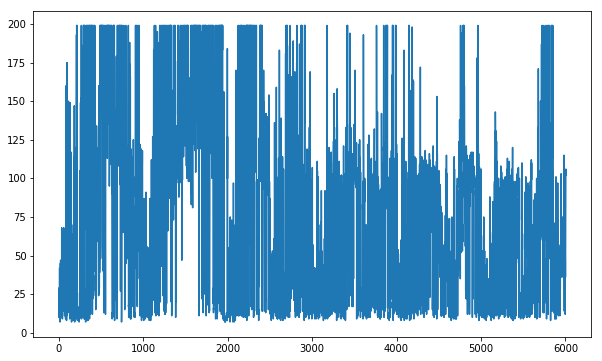

In [20]:
plt.figure(figsize=(10,6))
plt.plot(history['score'])